# ‏وَأَن لَّيْسَ لِلإِنسَانِ إِلاَّ مَا سَعَى, وَأَنَّ سَعْيَهُ سَوْفَ يُرَى , ثُمَّ يُجْزَاهُ الْجَزَاء الأَوْفَى.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
file=pd.read_csv('Flight price orediction.csv')

In [33]:
file

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [34]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [35]:
file.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [36]:
file.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [37]:
file.drop(columns='Unnamed: 0',inplace=True,axis=1)

In [38]:
file

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [39]:
file['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [40]:
file['class']=file['class'].map({'Economy':0,'Business':1})

In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

encoded_city=encoder.fit_transform(file[['source_city']])

encoded_city= pd.DataFrame(encoded_city, columns=encoder.get_feature_names_out(['source_city']))

file = pd.concat([file, encoded_city], axis=1)

file.drop(columns=['source_city'],inplace=True,axis=1)

In [42]:
file

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,SpiceJet,SG-8709,Evening,zero,Night,Mumbai,0,2.17,1,5953,0.0,0.0,1.0,0.0,0.0,0.0
1,SpiceJet,SG-8157,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,0.0,0.0,1.0,0.0,0.0,0.0
2,AirAsia,I5-764,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,0.0,0.0,1.0,0.0,0.0,0.0
3,Vistara,UK-995,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,0.0,0.0,1.0,0.0,0.0,0.0
4,Vistara,UK-963,Morning,zero,Morning,Mumbai,0,2.33,1,5955,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Morning,one,Evening,Hyderabad,1,10.08,49,69265,0.0,1.0,0.0,0.0,0.0,0.0
300149,Vistara,UK-826,Afternoon,one,Night,Hyderabad,1,10.42,49,77105,0.0,1.0,0.0,0.0,0.0,0.0
300150,Vistara,UK-832,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099,0.0,1.0,0.0,0.0,0.0,0.0
300151,Vistara,UK-828,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

encoded_airline=encoder.fit_transform(file[['airline']])

encoded_airline=pd.DataFrame(encoded_airline,columns=encoder.get_feature_names_out(['airline']))

file=pd.concat([file,encoded_airline],axis=1)

file.drop(columns=['airline'],axis=1,inplace=True)

In [44]:
file

,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Bangalore,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SG-8709,Evening,zero,Night,Mumbai,0,2.17,1,5953,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,SG-8157,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,I5-764,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UK-995,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,UK-963,Morning,zero,Morning,Mumbai,0,2.33,1,5955,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,Morning,one,Evening,Hyderabad,1,10.08,49,69265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300149,UK-826,Afternoon,one,Night,Hyderabad,1,10.42,49,77105,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300150,UK-832,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300151,UK-828,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_departure_time=encoder.fit_transform(file[['departure_time']])
encoded_departure_time=pd.DataFrame(encoded_departure_time,columns=encoder.get_feature_names_out(['departure_time']))
file=pd.concat([file,encoded_departure_time],axis=1)
file.drop(columns=['departure_time'],inplace=True,axis=1)

In [46]:
file

,flight,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,...,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,SG-8709,zero,Night,Mumbai,0,2.17,1,5953,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,SG-8157,zero,Morning,Mumbai,0,2.33,1,5953,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,I5-764,zero,Early_Morning,Mumbai,0,2.17,1,5956,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,UK-995,zero,Afternoon,Mumbai,0,2.25,1,5955,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,UK-963,zero,Morning,Mumbai,0,2.33,1,5955,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,one,Evening,Hyderabad,1,10.08,49,69265,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
300149,UK-826,one,Night,Hyderabad,1,10.42,49,77105,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
300150,UK-832,one,Night,Hyderabad,1,13.83,49,79099,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
300151,UK-828,one,Evening,Hyderabad,1,10.00,49,81585,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_destination_city=encoder.fit_transform(file[['destination_city']])
encoded_destination_city=pd.DataFrame(encoded_destination_city,columns=encoder.get_feature_names_out(['destination_city']))
file=pd.concat([file,encoded_destination_city],axis=1)
file.drop(columns=['destination_city'],inplace=True,axis=1)


In [48]:
file

,flight,stops,arrival_time,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SG-8709,zero,Night,0,2.17,1,5953,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SG-8157,zero,Morning,0,2.33,1,5953,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,I5-764,zero,Early_Morning,0,2.17,1,5956,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,UK-995,zero,Afternoon,0,2.25,1,5955,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,UK-963,zero,Morning,0,2.33,1,5955,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,one,Evening,1,10.08,49,69265,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300149,UK-826,one,Night,1,10.42,49,77105,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300150,UK-832,one,Night,1,13.83,49,79099,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300151,UK-828,one,Evening,1,10.00,49,81585,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
endoded_arrival_time=encoder.fit_transform(file[['arrival_time']])
endoded_arrival_time=pd.DataFrame(endoded_arrival_time,columns=encoder.get_feature_names_out(['arrival_time']))
file=pd.concat([file,endoded_arrival_time],axis=1)
file.drop(columns=['arrival_time'],inplace=True,axis=1)

In [50]:
file

,flight,stops,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,SG-8709,zero,0,2.17,1,5953,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SG-8157,zero,0,2.33,1,5953,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,I5-764,zero,0,2.17,1,5956,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,UK-995,zero,0,2.25,1,5955,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,UK-963,zero,0,2.33,1,5955,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,one,1,10.08,49,69265,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
300149,UK-826,one,1,10.42,49,77105,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300150,UK-832,one,1,13.83,49,79099,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300151,UK-828,one,1,10.00,49,81585,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_stops=encoder.fit_transform(file[['stops']])
encoded_stops=pd.DataFrame(encoded_stops,columns=encoder.get_feature_names_out(['stops']))
file=pd.concat([file,encoded_stops],axis=1)
file.drop(columns=['stops'],axis=1,inplace=True)

In [52]:
file

,flight,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,...,destination_city_Mumbai,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_one,stops_two_or_more,stops_zero
0,SG-8709,0,2.17,1,5953,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,SG-8157,0,2.33,1,5953,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,I5-764,0,2.17,1,5956,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,UK-995,0,2.25,1,5955,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,UK-963,0,2.33,1,5955,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,1,10.08,49,69265,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300149,UK-826,1,10.42,49,77105,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300150,UK-832,1,13.83,49,79099,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300151,UK-828,1,10.00,49,81585,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
file['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

# Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
# Not importand -----> Drop it

In [54]:
file.drop(columns=['flight'],axis=1,inplace=True)

In [55]:
file

,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,destination_city_Mumbai,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_one,stops_two_or_more,stops_zero
0,0,2.17,1,5953,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,2.33,1,5953,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,2.17,1,5956,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,2.25,1,5955,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,2.33,1,5955,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300149,1,10.42,49,77105,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300150,1,13.83,49,79099,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300151,1,10.00,49,81585,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
file['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

file['duration']=scaler.fit_transform(file[['duration']])


In [58]:
file['duration'].describe()

count    300153.000000
mean          0.232470
std           0.146775
min           0.000000
25%           0.122449
50%           0.212653
75%           0.313061
max           1.000000
Name: duration, dtype: float64

In [59]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   class                         300153 non-null  int64  
 1   duration                      300153 non-null  float64
 2   days_left                     300153 non-null  int64  
 3   price                         300153 non-null  int64  
 4   source_city_Bangalore         300153 non-null  float64
 5   source_city_Chennai           300153 non-null  float64
 6   source_city_Delhi             300153 non-null  float64
 7   source_city_Hyderabad         300153 non-null  float64
 8   source_city_Kolkata           300153 non-null  float64
 9   source_city_Mumbai            300153 non-null  float64
 10  airline_AirAsia               300153 non-null  float64
 11  airline_Air_India             300153 non-null  float64
 12  airline_GO_FIRST              300153 non-nul

In [ ]:
list_1=['price','class','duration','source_city_Bangalore','source_city_Chennai','source_city_Delhi','source_city_Hyderabad','source_city_Kolkata','source_city_Mumbai']
list_2=['price','airline_AirAsia','airline_Air_India','airline_GO_FIRST','airline_Indigo','airline_SpiceJet','airline_Vistara' ,'departure_time_Afternoon','departure_time_Early_Morning','departure_time_Evening' , 'departure_time_Late_Night']

In [60]:
labels=file['price']
features=file.drop(columns=['price'],axis=1)

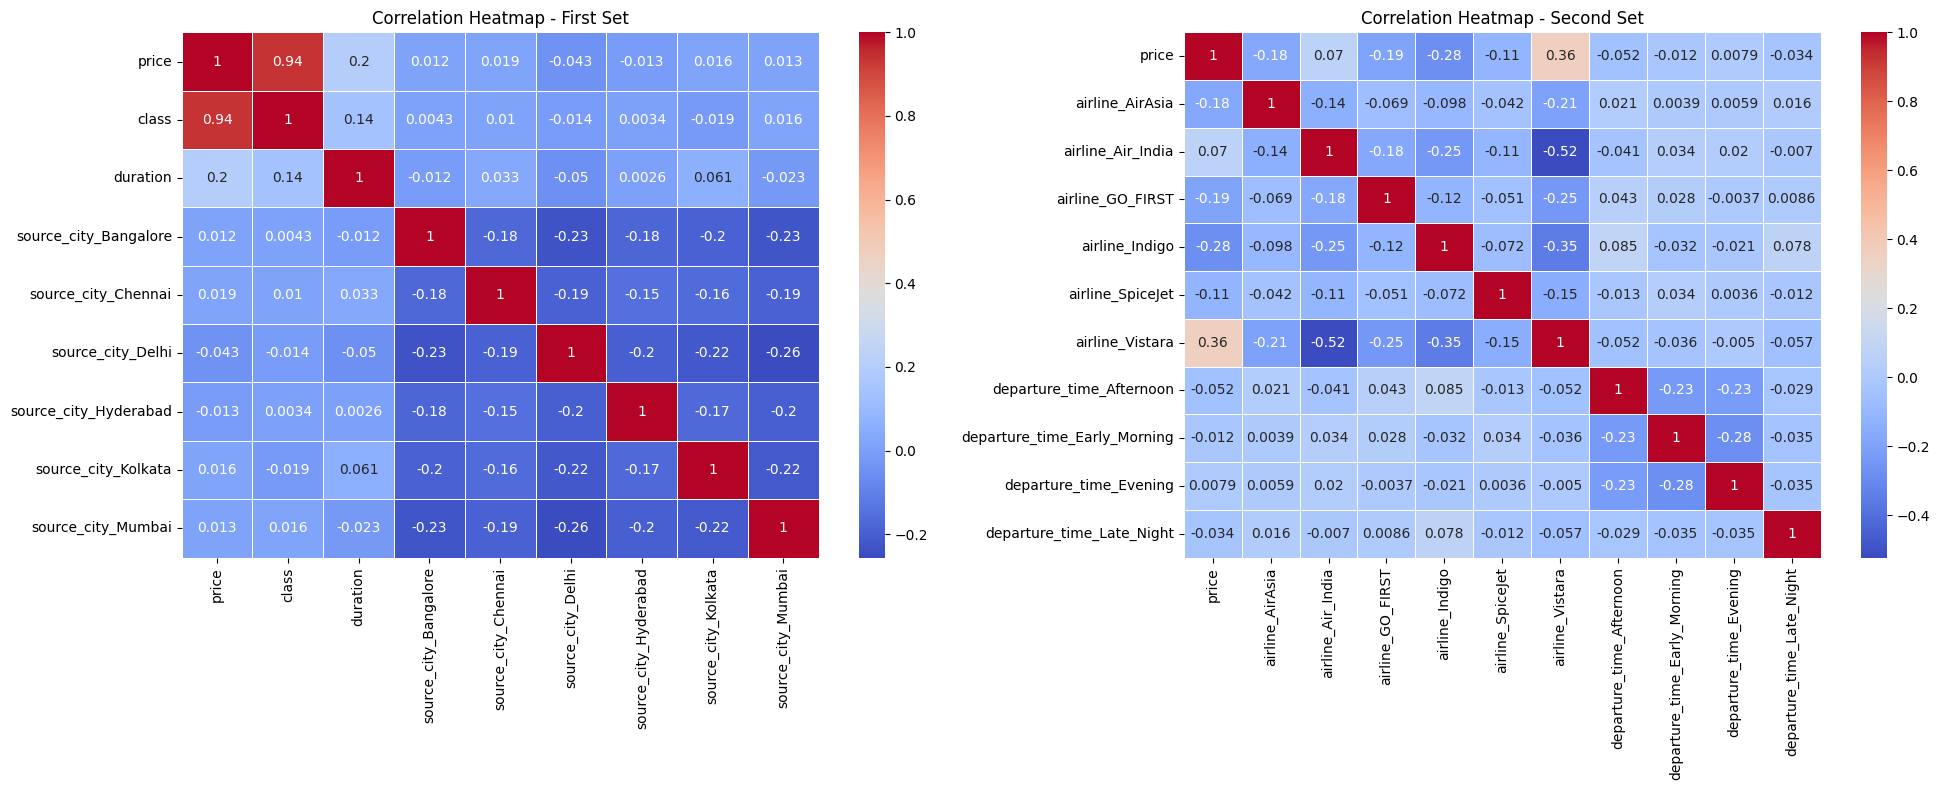

In [75]:
list_1=['price','class','duration','source_city_Bangalore','source_city_Chennai','source_city_Delhi','source_city_Hyderabad','source_city_Kolkata','source_city_Mumbai']
list_2=['price','airline_AirAsia','airline_Air_India','airline_GO_FIRST','airline_Indigo','airline_SpiceJet','airline_Vistara' ,'departure_time_Afternoon','departure_time_Early_Morning','departure_time_Evening' , 'departure_time_Late_Night']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))  
 
sns.heatmap(file[list_1].corr(),annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Heatmap - First Set")

sns.heatmap(file[list_2].corr(),annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Heatmap - Second Set")

plt.tight_layout()
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features,labels,random_state=42,test_size=.3)


In [77]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [78]:
model_LR_pre=model_LR.predict(x_test)


In [80]:
from sklearn.metrics import mean_squared_error,r2_score
model_LR_mse=mean_squared_error(y_test,model_LR_pre)
model_LR_r2=r2_score(y_test,model_LR_pre)

print('mse= ',model_LR_mse)
print('r2= ',model_LR_r2)

mse=  45560816.271482326
r2=  0.911475069547694


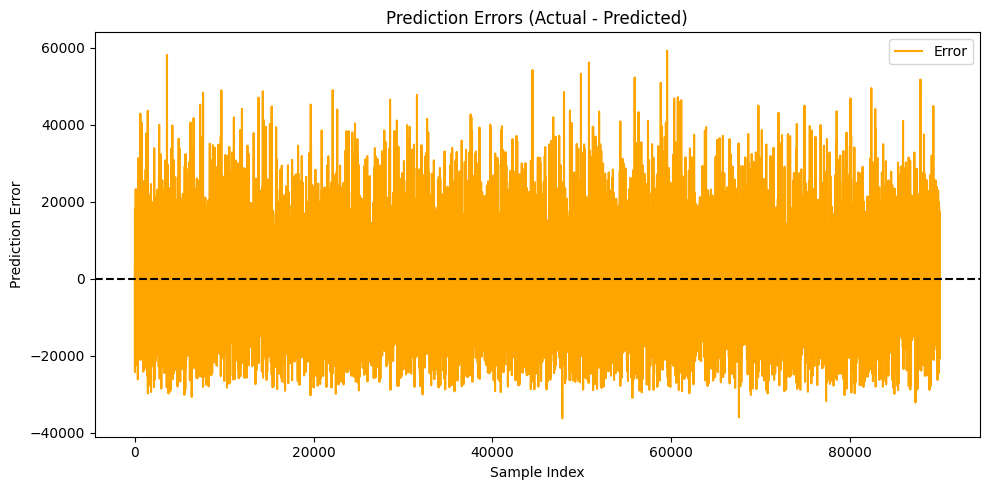

In [82]:
import numpy as np

errors = y_test - model_LR_pre

plt.figure(figsize=(10, 5))
plt.plot(errors.values, label='Error', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors (Actual - Predicted)')
plt.legend()
plt.tight_layout()
plt.show()


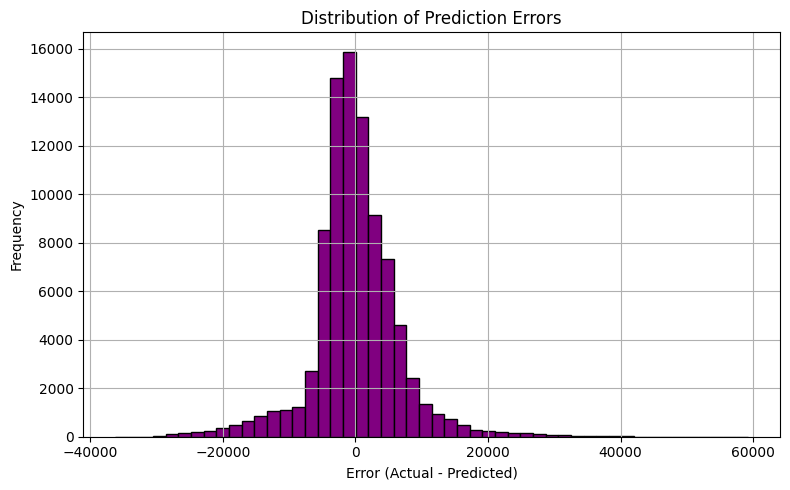

In [83]:
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


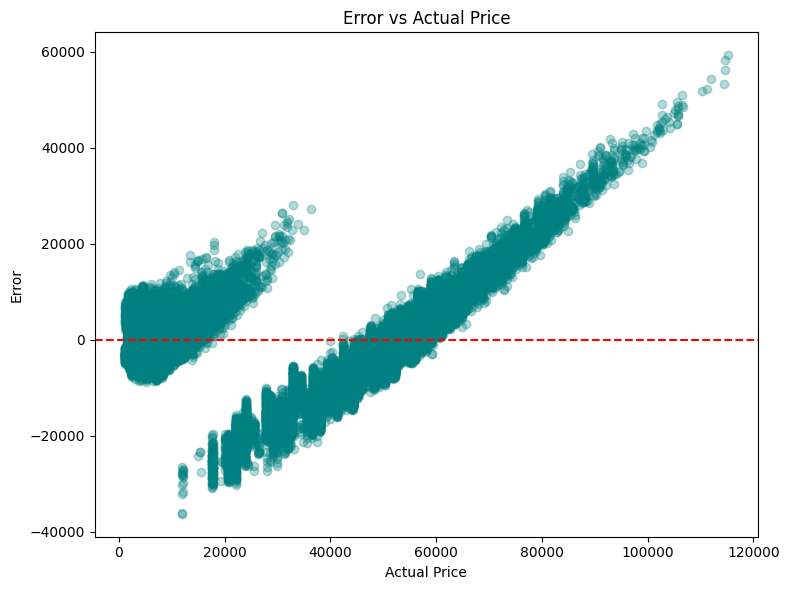

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errors, alpha=0.3, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Error")
plt.title("Error vs Actual Price")
plt.tight_layout()
plt.show()


In [86]:
from sklearn.ensemble import AdaBoostRegressor

model_AD=AdaBoostRegressor(n_estimators=70,learning_rate=.01,random_state=42)

model_AD.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=70, random_state=42)

In [87]:
model_AD_pre=model_AD.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error,r2_score
model_AD_mse=mean_squared_error(y_test,model_AD_pre)
model_AD_r2=r2_score(y_test,model_AD_pre)

print('mse= ',model_AD_mse)
print('r2= ',model_AD_r2)

mse=  33806333.34642851
r2=  0.9343140980945667


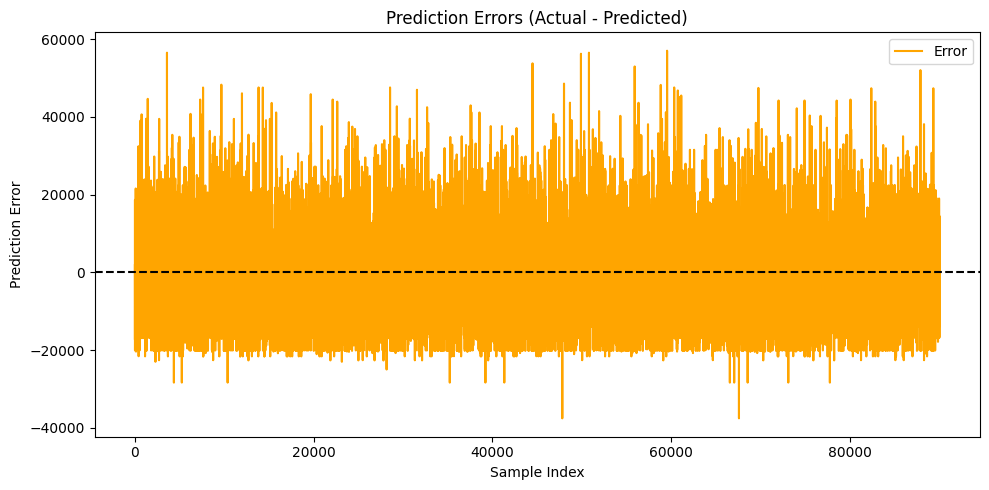

In [92]:
errors = y_test - model_AD_pre

plt.figure(figsize=(10, 5))
plt.plot(errors.values, label='Error', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors (Actual - Predicted)')
plt.legend()
plt.tight_layout()
plt.show()

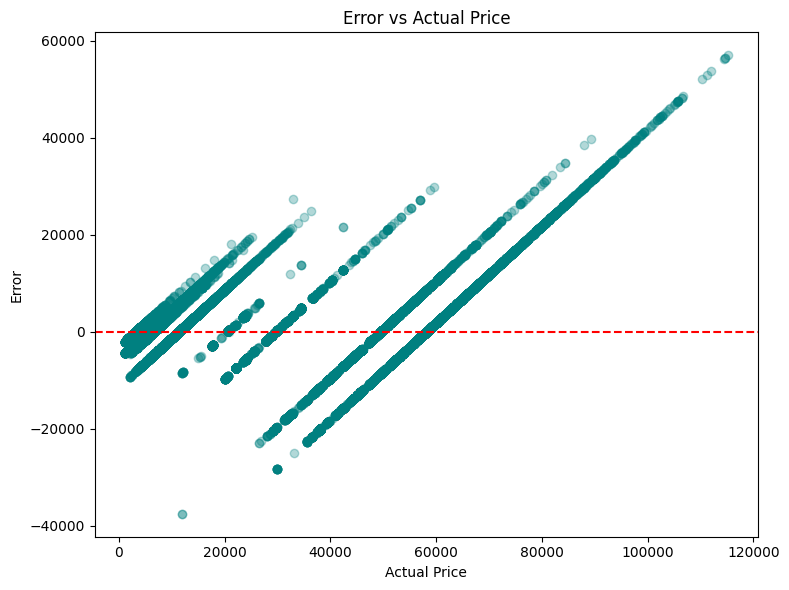

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errors, alpha=0.3, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Error")
plt.title("Error vs Actual Price")
plt.tight_layout()
plt.show()